# Лабораторная работа 3

## Сингулярное разложение и его приложения

Напомним, что сингулярным разложением (SVD, Singular value decomposition) матрицы $A$ размера $m\times n$ называется представление

$$A = U\Sigma V^T,$$

где $U$ — ортогональная матрица размера $m\times m$, $V$ — ортогональная матрица размера $n\times n$, $\Sigma = \mathrm{diag}(\sigma_1,\sigma_2,\sigma_3,\ldots)$ — диагональная матрица размера $m\times n$, в которой $\sigma_1\geqslant\sigma_2\geqslant\ldots\geqslant0$.

На самом деле, требование, чтобы матрицы $U$ и $V$ были квадратными, избыточно. *Усечённым сингулярным разложением* мы будем называть разложение

$$A = U\Sigma V^T,$$

где $U$ — ортогональная матрица размера $m\times k$, $V^T$ — ортогональная матрица размера $k\times n$, $\Sigma$ — диагональная матрица размера $k\times k$, причём $k = \min(m,n)$. Далее мы будем работать исключительно с усечённым разложением.

### Сжатие данных с помощью SVD = построение низкорангового приближения

Введём *норму Фробениуса* матрицы как

$$||A||_{frob} = \sqrt{\mathrm{tr}{A^TA}} = \sqrt{\sum\limits_{i,j}a^2_{i,j}}$$

Иными словами, это обычное евклидово расстояние на пространстве, которое получается, если все матрицы вытянуть в длинные векторы.

Зададимся вопросом: как найти матрицу $A_{r}$ ранга $r$, наименее отличающуюся от $A$ по норме Фробениуса (то есть для которой норма разности $||A - A_{r}||_{frob}$ минимальна). Оказывается, это можно сделать с помощью сингулярного разложения:

**Теорема.** Пусть $\Sigma_{r}$ — это матрица, полученная из $\Sigma$ заменой диагональных элементов $\sigma_{i}$ ($i > r$) нулями, тогда $A_{r} = U\Sigma_{r}V^T$.

Это можно переписать и в более экономичном виде. Если

$$A = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1k}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mk}
\end{pmatrix}}_{=U}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \sigma_{2} & \\
 & & \ddots
\end{pmatrix}}
}_{=\Sigma}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1k} & \ldots & v_{nk}
\end{pmatrix}}_{=V^T}$$

то

$$A_{r} = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1r}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mr}
\end{pmatrix}}_{=U_r}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \ddots & \\
 & & \sigma_{r}
\end{pmatrix}}
}_{=\Sigma_r}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1r} & \ldots & v_{nr}
\end{pmatrix}}_{=V^T_r}$$

При этом

$$||A - A_{r}||_{frob} = \sqrt{\sum\limits_{i\geqslant r+1} \sigma_{i}^2}$$

Если сингулярные значения матрицы падают достаточно быстро (а в реальных задачах часто бывает именно так), то норма разности будет малой при сравнительно небольшом значении $r$.

На хранение исходной матрицы нам требовалось $m\times n$ памяти. Теперь же, если мы будем хранить отдельно $U_r$, $V_r$ и диагональные элементы $\Sigma_r$, затраты памяти составят $mr + nr + r = r(m + n + 1)$.

**Разложение на компоненты ранга 1**

Обозначим через $u_1,\ldots, u_k$ столбцы матрицы $U$, а через $v_1, \ldots, v_k$ столбцы матрицы $V$. Тогда имеет место равенство

$$A = u_1\sigma_{1}v_1^T + u_2\sigma_{2}v_2^T + u_3\sigma_{3}v_3^T + \ldots$$

Матрицу $u_k\sigma_{k}v_k^T = \sigma_{k}u_kv_k^T$ мы будем называть $k$-й компонентой ранга 1 матрицы $A$. Отметим, что слагаемые в этой сумме ортогональны относительно скалярного произведения $(X, Y) = \mathrm{tr}(X^TY)$ (порождающего норму Фробениуса).

Как нетрудно заметить,

$$A_{r} = \sigma_{1}u_1v_1^T + \sigma_{2}u_2v_2^T + \ldots + \sigma_{r}u_rv_r^T$$

**Технические детали (SVD в Питоне)**

Есть несколько способов сделать в Питоне сингулярное разложение; мы пока предлагаем Вам использовать

`import scipy.linalg as sla`

`U, S, Vt = sla.svd(X, full_matrices=False)`

Для ознакомления с особенностями этой функции рекомендуем обратиться к [документации](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html) (в частности, обратите внимание на то, какие именно объекты она возвращает).

### Правила оформления графиков

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. 

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

Ещё одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё. 

Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- для точек из разных выборок, необходимо использовать разные цвета;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- размер графика должен быть таким, чтобы по нему несложно было сделать необходимые выводы о данных;
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

Помните, что проверяющий имеет право снизить оценку за неопрятные графики.

### Оценивание

Обратите внимание, что в каждом разделе есть задания на написания кода и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если Вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то в подавляющем большинстве случаев баллы за такое выставлены не будут.

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-linregr-Username.ipynb, где Username — Ваша фамилия.

### Задание 1. Сжатие данных с помощью SVD

Загрузите выложенную на странице курса фотографию.

In [2]:
import numpy as np
from skimage.io import imread



img = imread(r'chain_small.JPG')
img = img.mean(axis=2) # это матрица из интенсивностей серого цвета; её уже можно подвергать SVD

Нарисуйте картинку:

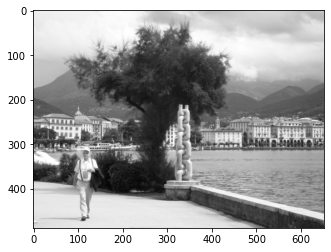

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

imgplot = plt.imshow(img, cmap='gray')

Постройте сингулярное разложение этой матрицы.

In [4]:
from numpy.linalg import svd

U, S, VT = svd(img, full_matrices=False)

**1. [0.1 балла]** Нарисуйте график диагональных элементов матрицы $\Sigma$:

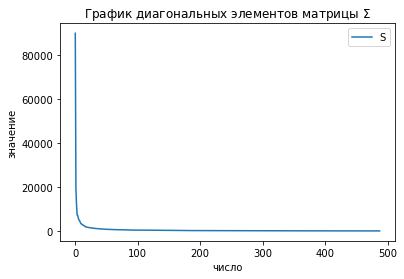

In [5]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.plot(S);
plt.ylabel('значение')
plt.xlabel('число')
plt.title('График диагональных элементов матрицы $\Sigma$')
plt.legend("S");

Кажется, что они убывают достаточно быстро и есть надежда, что первые несколько компонент дадут картинку, близкую к исходной.

**Важно:** при визуализации различных компонент в этом задании используйте только матричные операции. В частности, избегайте циклов, функций `map` и `reduce`, а также специальных функций, находящих суммы компонент.

**2. [0.1 балла]** Визуализуйте первую компоненту ранга 1. Ожидали ли Вы увидеть именно это? Поясните.

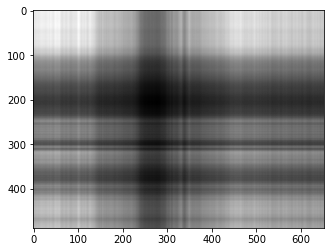

In [6]:
image = np.dot(np.dot(U[:, 0:1], np.diag(S[0:1])), VT[0:1, :])
plt.imshow(image, cmap='gray');

Да, этого можно было ожилать. Это матрица ранга 1. То есть можно считать, что все строчки пропорциональны какой-то одной (назовем эту строчку порождающей). Эта строчка явлеяется самой "весомой" компонентой. Она должна передавать основную информацию. Если на какой-то горизонтали цвета преимущественно темные, то нужно взять эту порождающую строчку менее "яркой" (то есть с меньшим скаляром). Если же на горизонтали преимущественно яркие цвета, то надо взять с бОльшим скаляром. Аналогично по вертикали: если на вертикали больше темных предметов, то элементы в порождающей строчке, соответствующие этой вертикали, будут меньше (=темнее), чем элементы, отвечающие вертикали с преобладанием яркого цвета. То есть более "темные" элементы будут более темными во всех строчках. Аналогично, если горизонталь в изображении сама по себе темная, то в матрице получим порождающую строку, умноженную на маленький скаляр, то есть все элементы в целом в ней будут более темными. 

**3. [0.5 балла]** Визуализуйте суммы компонент ранга 1 с первой по двадцатую, с первой по пятидесятую, с двадцатой по сотую, с двадцатой по последнюю. Сделайте выводы.

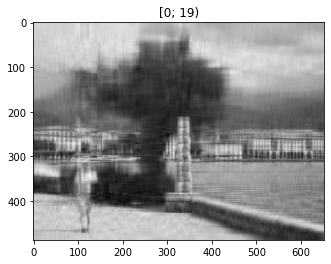

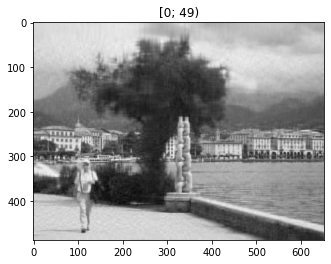

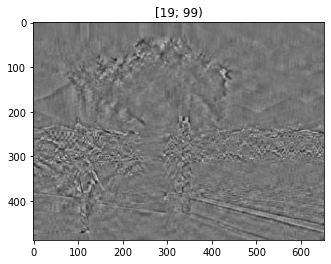

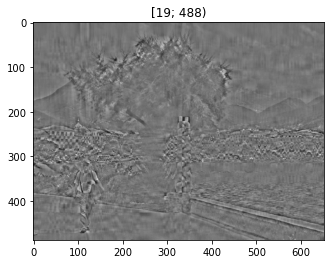

In [7]:
def visualise(l, r):
    newimg = np.dot(np.dot(U[:, l:r], np.diag(S[l:r])), VT[l:r, :])
    plt.title(f'[{l}; {r})')
    plt.imshow(newimg, cmap='gray')
    plt.show();
    
    
visualise(0, 19)
visualise(0, 49)
visualise(19, 99)
visualise(19, len(S))

Здесь все как и можно было предположить. А именно: первые (самые "весомые") компоненты вносят наибольший вклад (элементы по модулю больше всего), они показывают основные детали на картинке.
На последних двух визуализациях ничего не понятно, ведь они вносят лишь немного правок и дополняют детали изображения. Видимо, менее важными слоями происходит более тщательная "прорисовка" мелких деталей.

**4. [0.35 балла]** Как Вам кажется, какие компоненты нужно взять для достаточно хорошего восстановления исходного изображения? Аргументируйте свой ответ. Не забудьте визуализировать сумму выбранных компонент.

*Комментарий: для получения полного балла за это задания постарайтесь привести более убедительный аргумент, нежели Ваши субъективные впечатления от сравнения полученного изображения с исходным.*

В данном случае большую роль играет цель восстановления исходного изображения. Если нам достаточно отличить дерево от гор, то хватит и перых 20 компонент. Можно заметить, что после 100 значение диагональных элементов близко к 0.
Поэтому добавление компонент после 100 не будет давать сильного улучшения картинки.

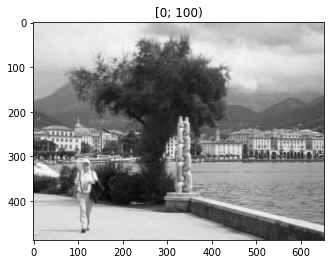

In [8]:
visualise(0, 100)

**5. [0.15 балла]** Во сколько раз меньше памяти (теоретически) потребуется для хранения нового изображения по сравнению с исходным?

In [9]:
print(U.shape)
print(VT.shape)

(488, 488)
(488, 653)


Изначально изображение хранится в матрице 488x653 = 318664.
В виде компонент разложения есть 3 матрицы 488x100, 100, 100x653.
Итого = 100*(488+1+653) = 114200.
Таким образом, мы используем в 2.8 раз меньше памяти

**6. [0.25 балла]** Подсчитайте, сколько в действительности места в памяти компьютера занимают исходная матрица и компоненты её сингулярного разложения. Согласуется ли этот результат с ответом предыдущего пункта? Сделайте выводы.

In [10]:
U_new, S_new, VT_new = U[:, 0:60], S[0:60], VT[0:60, :]
print("Исходная матрица весит:", img.nbytes)
print("Компоненты сингулярного разлодения с приближением весят:", U_new.nbytes + S_new.nbytes + VT_new.nbytes)

Исходная матрица весит: 2549312
Компоненты сингулярного разлодения с приближением весят: 548160


### Задание 2. Геометрия SVD. Визуализация данных с помощью SVD

**Геометрический смысл SVD**

Допустим, что у нас есть выборка $x_1,\ldots,x_m\in\mathbb{R}^n$. Запишем её в матрицу объекты-признаки

$$X = \begin{pmatrix}
x_{11} & \ldots & x_{1n}\\
\vdots & & \vdots\\
x_{m1} & \ldots & x_{mn}
\end{pmatrix}$$

(строки — объекты, столбцы — признаки) и сделаем SVD-разложение: $X = U\Sigma V^T$. Его можно интерпретировать следующим образом:

$$X = U\Sigma\cdot V^T,$$

где $U\Sigma$ — это матрица объекты-признаки для тех же объектов, но в новых признаках, полученных из исходных с помощью линейного преобразования $V$ (напоминаем, что умножение на матрицу справа соответствует преобразованию столбцов). Попробуем понять, чем замечательны эти признаки.

Рассмотрим матрицу $X^TX = V\Sigma^2V^T$. Легко видеть, что это матрица Грама системы столбцов матрицы $X$; иными словами, в ней записаны скалярные произведения векторов различных признаков. Из лекций вы знаете, что $\sigma_1^2$, квадрат первого сингулярного числа, это наибольшее собственное значение матрицы $X^TX$, а $v_1$, первый столбец матрицы $V$, — это соответствующий собственный вектор. Можно показать, что

$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}\left(|Xw|\right).$$

Попробуем осознать физический смысл этой штуки. Напомним, что строки матрицы $X$ — это координаты объектов $x_1,\ldots,x_m$ в пространстве признаков. Произведение $Xw$ — это вектор из значений на тех же самых объектах некоторого нового признака, являющегося линейной комбинацией исходных с коэффициентами $w_1,\ldots,w_n$:

$$Xw = w_1\begin{pmatrix} x_{11}\\ \ldots \\ x_{m1}
\end{pmatrix} + w_2\begin{pmatrix} x_{12}\\ \ldots \\ x_{m2}
\end{pmatrix} + \ldots + w_n\begin{pmatrix} x_{1n}\\ \ldots \\ x_{mn}
\end{pmatrix}$$

Соответственно, $|Xw|^2$ — это квадрат длины вектора, составленного из значений нового признака.

Таким образом, первому сингулярному значению $\sigma_1$ отвечает такой признак, у которого сумма квадратов значений максимальна, то есть признак, принимающий, условно говоря, самые большие значения.

Резюмируя, мы можем сказать, что сингулярное разложение делает следующее:
- находит новый признак (новое направление) вдоль которого "дисперсия"$^1$ максимальна;
- в ортогональной ему плоскости находит признак, вдоль которого "дисперсия" максимальна;
- и так далее.

---
$^1$ настоящая выборочная дисперсия с точностью до числового множителя была бы равна $|Xw - \overline{Xw}|^2$, где $\overline{Xw} = \frac1m\sum_{i=1}^m(Xw)_i$ — среднее значения признака.

**1. [1.25 балла]** Пусть $\sigma_1$ — старшее сингулярное число матрицы $X$ размера $m \times n$. Покажите, что верна цепочка равенств
$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}~|Xw| = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|.$$

Рассмотрим матрицу $XX^T$. Это матрица Грама, поэтому она симметрична. Если эта матрица ГРама соответсвует какому-то линейному оператору, то по теореме мы можем найти ортонормированный базис из собственных вечкторов для данного линейного оператора. Обозначим этот базис $(e_1, e_2... e_n)$, а собственными значениями будут $(\sigma_1^2, \sigma_2^2 ... \sigma_n^2) \\ 
w \in \langle e_1, e_2 ... e_n\rangle \Rightarrow a_1e_1 + ... + a_ne_n \Rightarrow |w|^2 = a_1^2 + ... + a_n^2 \\ 
|Xw|^2 = (Xw)^T(Xw) = w^TX^TXw = w^T (X^TXw) \\ 
X^TXw = X^TX(a_1e_1 + ... + a_ne_n)$
Так как $(e_1, ... e_n)$ - ортонормированный базис:
$$\\ |Xw|^2 = w^TX^TXw = a_1^2\sigma_1^2 + ... + a_n^2\sigma_n^2 \\ $$
Так как $\sigma_1$ - старшее сингулярное разложение.
$$|Xw|^2 \leq \sigma_1^2 (a_1^2+ ... + a_n^2)$$
$$ \sigma_1^2 \geq \frac{|Xw|^2}{|w|^2} $$
$$ \sigma_1 \geq \frac{|Xw|}{|w|} $$
Если взять $w = e_1$, тогда:
$$ |Xw|^2  = e_1^TX^TXe_1 = \sigma_1^2$$
Следовательно, $\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}~|Xw|$

**2. [0.75 балла]** Рассмотрим матрицу $A = (a_{ij})$ размера $n \times n$, такую что $a_{ij} = \sin i \cdot \cos j$, причём нумерация ведётся с нуля. Найдите $r = \text{rk}A$ (можете считать, что $n > 1$), а также разложение (Compact SVD) $A=U \Sigma V^T$, где $U$ и $V$ — матрицы с ортогональными столбцами размеров $n\times r$ и $r\times n$ соответственно, а $\Sigma = \mathrm{diag}(\sigma_1,\ldots,\sigma_r)$ — диагональная матрица размера $r\times r$, в которой $\sigma_1\geqslant\ldots\geqslant\sigma_r > 0$. 

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**3. [0.5 балла]** Рассмотрим полное сингулярное разложение $A = U \Sigma V^T$ для матрицы размера $m \times n$, такой что $\text{rk}A=r$. Определим также линейное отображение $\mathcal{A} \colon \mathbb{R}^n \to \mathbb{R}^m$, которое действует умножением на матрицу $A$. Покажите, что $\text{Im}\mathcal{A} = \langle u_1, \ldots, u_r \rangle$, а $\text{Ker}\mathcal{A} = \langle v_{r+1}, \ldots, v_n \rangle$.

Пусть линейное отображение $\phi: R^n\to R^m, x\to X\cdot x$, применяем SVD, получаем $ X=U\Sigma V^T$,где $U$ — ортогональная матрица размера $m\times m$, $V$ — ортогональная матрица размера $n\times n$, $\Sigma = \mathrm{diag}(\sigma_1,\sigma_2,\sigma_3,\ldots)$ — диагональная матрица размера $m\times n$, в которой $\sigma_1\geqslant\sigma_2\geqslant\ldots\geqslant0$ и знаем, что $\exists k \in [1,\ldots, n]$, $\sigma_k > 0$, но $\sigma_{k+1} = 0$. Пусть $st(n)$ - ст. базис $R^n$, $st(m)$ - ст. базис $R^m$, тогда $A(\phi, st(n), st(m))=X$. Заметим, что $\Sigma = U^TXV$, то есть V - матрица перехода из базиса st(n) в базис v(базис v - это слолбцы матрицы V), U - матрица перехода из базиса st(m) в базис u(базис u - это слобцы матрицы U), $\Sigma = A(\phi, v, u), \text{rk}\phi = k=\text{rk}X=\text{rk}\Sigma$(т.к. $\sigma_i > 0$ при $i\leq k$ и $\sigma_i = 0$ при $i > k$, а ранг линейного оператора не зависит от выбора базиса) ,  $\phi(v_i)=\sigma_i \cdot u_i$ при $i \leq k$ и $\phi(v_i)=0$, иначе. Тогда $v_{k+1}, v_{k+2},\ldots, v_{n}\in \text{Ker}\phi$ и $u_{1}, u_{2},\ldots, u_{k}\in \text{Im}\phi$, тогда $\text{dim}(\text{Ker}\phi) \geq n-k$ и $\text{dim}(\text{Im}\phi) \geq k$, но $n=\text{dim}(R^n)=\text{dim}(\text{Ker}\phi)+\text{dim}(\text{Im}\phi) \geq n-k+k=n$, значит $\text{dim}(\text{Im}\phi)=k$ и $\text{Im}\phi = \langle u_1, \ldots, u_k \rangle$, а $\text{dim}(\text{Ker}\phi)=k$ и $\text{Ker}\phi = \langle v_{k+1}, \ldots, v_n \rangle$, где $k=\text{rk}\phi=\text{rk}X$.
Что и требовалось доказать.

**4. [0.75 балла]** Рассмотрим матрицу $A$ размера $m \times n$, такую что $m \geqslant n$ и столбцы $A$ линейно независимы. Найдите матрицу $\Sigma$ из полного сингулярного разложения для матрицы $P = A(A^T A)^{-1} A^T$.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**Визуализация данных с помощью SVD**

Выше мы обсудили, что первые из "новых" признаков — это признаки, значения которых, скажем так, наиболее разнообразны. Зачастую (хотя и не всегда) именно они несут в себе наиболее важные черты датасета. И если взять два-три первых, то датасет можно нарисовать и посмотреть на него — и, возможно, обнаружить какую-то структуру.

С помощью функции `dsklearn.datasets.load_digits()` загрузите датасет рукописных цифр [MNIST](http://yann.lecun.com/exdb/mnist/). В нём есть несколько атрибутов; вам сейчас будут нужны `digits.data` (`np.array`, строки которого — это вытянутые в одну строку значения пикселей) и `digits.target` (в них записаны соответствующие цифры).

0


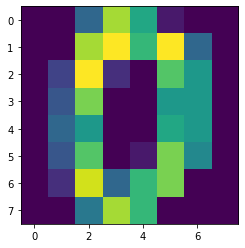

In [14]:
from sklearn import datasets

digits = datasets.load_digits()

print(digits.target[0])

plt.imshow(digits.data[0].reshape((8,8)));

**5. [0.1 балла]** Примените к матрице `digits.data` сингулярное разложение.

In [15]:
U, S, VT = svd(digits.data, full_matrices=False)

**6. [0.65 балла]** Визуализируйте данные, спроецировав их на такую плоскость, чтобы координаты точек соответствовали первым двум новым признакам. Не забудьте покрасить точки, отвечающие различным цифрам, в разные цвета (если Вы любите красивые визуализации, разберитесь, как вместо точек рисовать маленькие цифры).

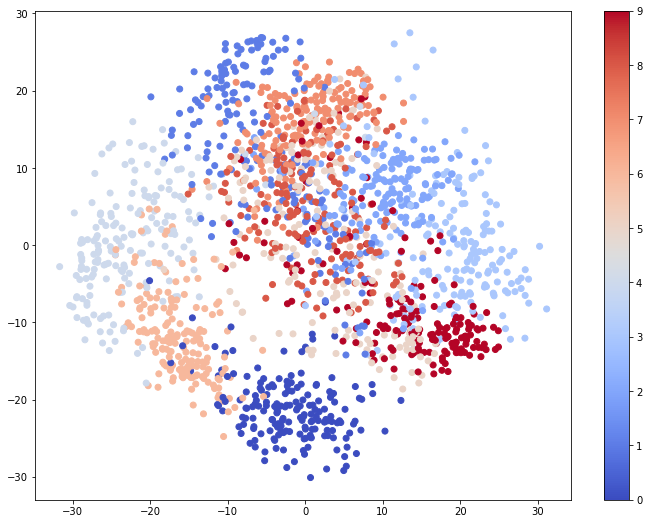

In [46]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
M = np.dot(U, np.diag(S))[:, :2]

plt.figure(figsize=(12, 9))
plt.scatter(M[:, 0], M[:, 1], c=digits.target, cmap='coolwarm')
plt.colorbar()
plt.show();

**7. [0.25 балла]** Теперь вычтите из каждого признака его среднее значение, снова сделайте SVD и нарисуйте разноцветные точки.

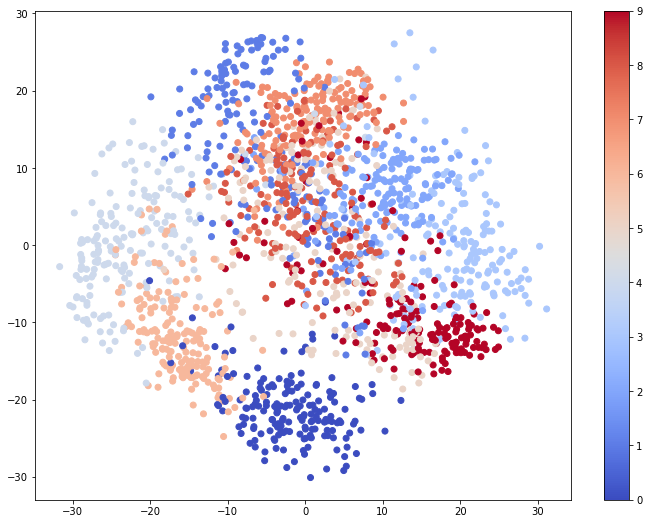

In [45]:
X = digits.data
X -= np.mean(X, axis=0) 
U, S, VT = svd(digits.data, full_matrices=False)
M = np.dot(U, np.diag(S))[:, :2]
plt.figure(figsize=(12, 9))
plt.scatter(M[:, 0], M[:, 1], c=digits.target, cmap='coolwarm')
plt.colorbar()
plt.show();

**8. [0.25 балла]** Сравните выполненные Вами в двух предыдущих пунктах визуализации. Чем последняя выгодно отличается от первой?

На первом графике цвета расположены хаотично, на втором же графике они сгруппированы. Это произошло по той причине, что мы нормализовали данные.  

In [20]:
import warnings
warnings.filterwarnings("ignore")

**9. [1 балл]** Сравните работу SVD с другим методом понижения размерности: [случайными гауссовскими проекциями](http://scikit-learn.org/stable/modules/generated/sklearn.random_projection.GaussianRandomProjection.html).

*Комментарий: Эксперименты без выводов, объясняющих полученные результаты, не оцениваются. Для получения полного балла за этот пункт постарайтесь провести как можно больше разноплановых экспериментов.*

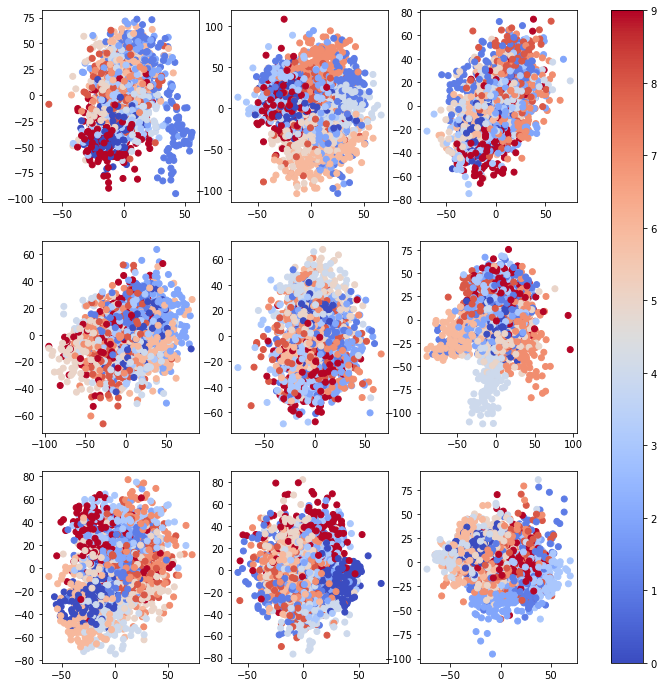

In [44]:
from sklearn.random_projection import GaussianRandomProjection

fig, ax = plt.subplots(3, 3, figsize=(12, 12))

for it in range(1, 4):
    for dec in range(1, 4):
        rng = np.random.RandomState(it + dec * 10)
        new_values = GaussianRandomProjection(n_components=2, random_state=rng).fit_transform(digits.data)
        sp = ax[it - 1][dec - 1].scatter(new_values[:, 0], new_values[:, 1], c=digits.target, cmap='coolwarm')
        
fig.colorbar(sp, ax=ax[:, :])
fig.show();

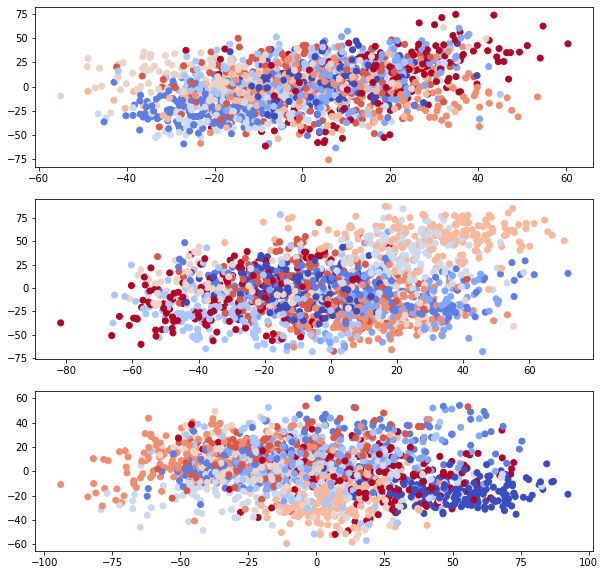

In [43]:
from sklearn.random_projection import GaussianRandomProjection

fig, ax = plt.subplots(3, 1, figsize=(10, 10))

for it in range(1, 4):
    rng = np.random.RandomState(it)
    new_values = GaussianRandomProjection(n_components=2, random_state=rng).fit_transform(digits.data)
    ax[it - 1].scatter(new_values[:, 0], new_values[:, 1], c=digits.target, cmap='coolwarm')
        
fig.show()

В итоге, как мы видим по графикам, данный метод является рандомизированным и его качество примерно сравнимо с тем, что мы получили до вычитания среднего. В данном случае совсем очевидно, что в конечном счете SVD справилось намного лучше с задачей.
Попробуем еще подвигать eps-параметр в данном методе.
Стоит уменьшать eps параметр для достижения более качественного результата.

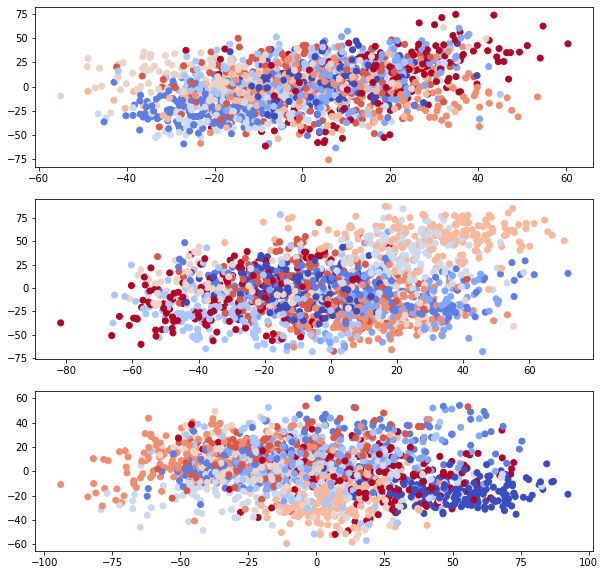

In [42]:
fig, ax = plt.subplots(3, 1, figsize=(10, 10))

for it in range(1, 4):
    rng = np.random.RandomState(it)
    new_values = GaussianRandomProjection(n_components=2, random_state=rng, eps=0.01).fit_transform(digits.data)
    ax[it - 1].scatter(new_values[:, 0], new_values[:, 1], c=digits.target, cmap='coolwarm')
        
fig.show();

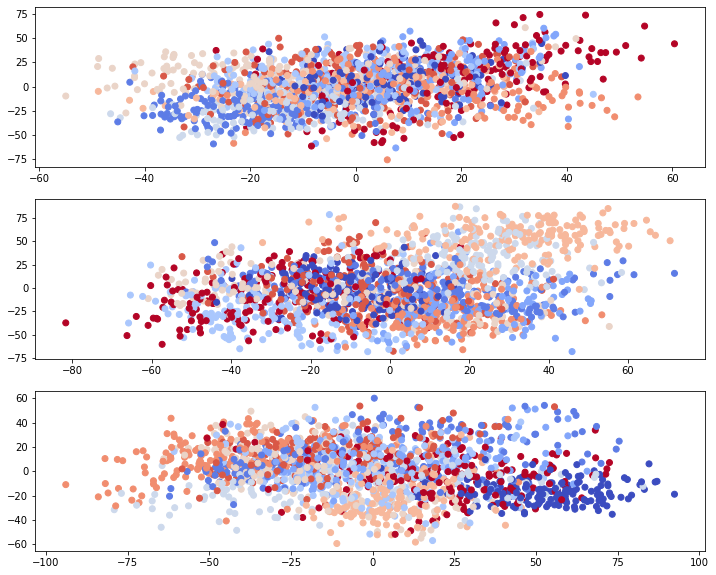

In [60]:
fig, ax = plt.subplots(3, 1, figsize=(12, 10))

for it in range(1, 4):
    rng = np.random.RandomState(it)
    new_values = GaussianRandomProjection(n_components=2, random_state=rng, eps=0.05).fit_transform(digits.data)
    ax[it - 1].scatter(new_values[:, 0], new_values[:, 1], c=digits.target, cmap='coolwarm')
        
fig.show()

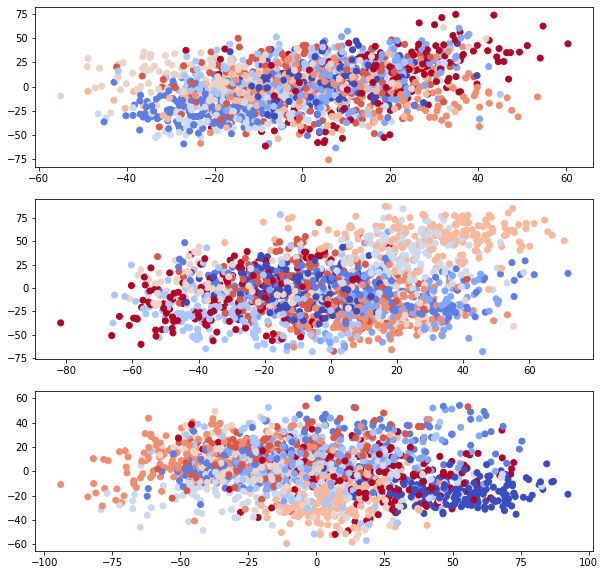

In [37]:
fig, ax = plt.subplots(3, 1, figsize=(10, 10))

for it in range(1, 4):
    rng = np.random.RandomState(it)
    new_values = GaussianRandomProjection(n_components=2, random_state=rng, eps=0.3).fit_transform(digits.data)
    ax[it - 1].scatter(new_values[:, 0], new_values[:, 1], c=digits.target, cmap='coolwarm')
        
fig.show()

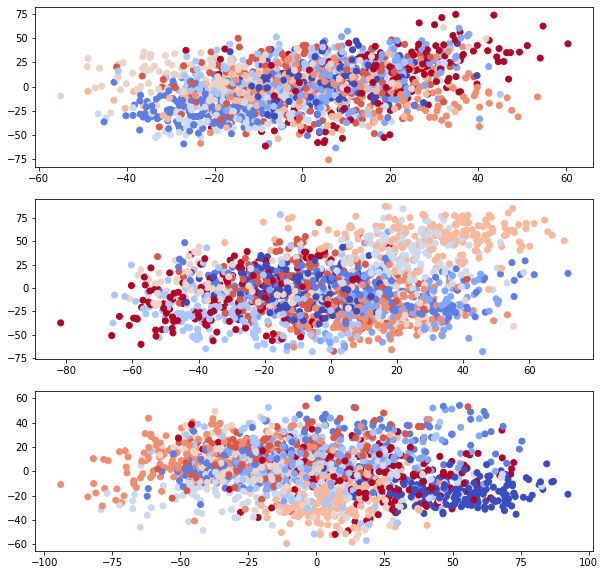

In [36]:
fig, ax = plt.subplots(3, 1, figsize=(10, 10))

for it in range(1, 4):
    rng = np.random.RandomState(it)
    new_values = GaussianRandomProjection(n_components=2, random_state=rng, eps=0.5).fit_transform(digits.data)
    ax[it - 1].scatter(new_values[:, 0], new_values[:, 1], c=digits.target, cmap='coolwarm')
        
fig.show();

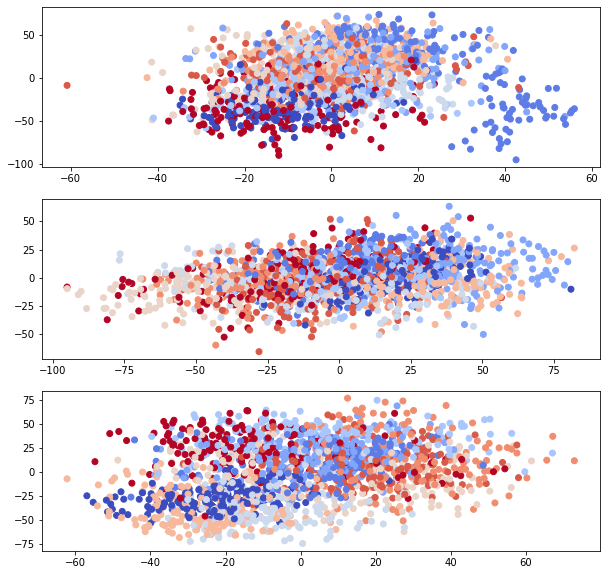

In [35]:

fig, ax = plt.subplots(3, 1, figsize=(10, 10))

for it in range(1, 4):
    rng = np.random.RandomState(it + 10)
    new_values = GaussianRandomProjection(n_components=2, random_state=rng, eps=0.00000001).fit_transform(digits.data)
    ax[it - 1].scatter(new_values[:, 0], new_values[:, 1], c=digits.target, cmap='coolwarm')
        
fig.show()

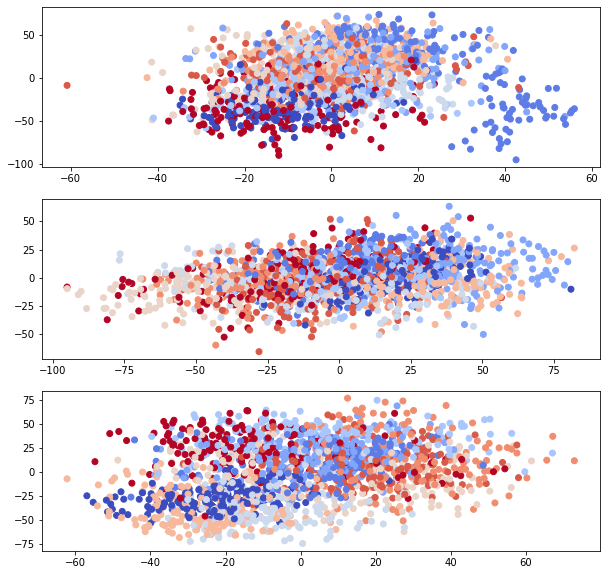

In [47]:
fig, ax = plt.subplots(3, 1, figsize=(10, 10))

for it in range(1, 4):
    rng = np.random.RandomState(it + 10)
    new_values = GaussianRandomProjection(n_components=2, random_state=rng, eps=0.001).fit_transform(digits.data)
    ax[it - 1].scatter(new_values[:, 0], new_values[:, 1], c=digits.target, cmap='coolwarm')
        
fig.show()

Как можно видеть, при уменьшении eps качество несколько выросло, но в целом данный метод понижения раазмерности не сильно помогает, поскольку в центре диаграмм все равно остается довольно непонятное скопление точек, по которым нельзя ничего сказать.

### Задание 3. Когда SVD не сработает

**Disclaimer**

Цель этого задания — познакомить Вас не только с геометрическим смыслом сингулярного разложения, но и перекинуть очередной мостик между линейной алгеброй и анализом данных. К сожалению, на том берегу Вас встретят разные пока неизведанные понятия; мы постараемся по возможности дать какие-то определения, но, конечно, нет никакой возможности изложить на этих страницах полный курс теории вероятностей. Поэтому какие-то вещи останутся недосказанными или необоснованными; если Вам будет интересно, не стесняйтесь читать соответствующую литературу или хотя бы Википедию, а если нет, то мы надеемся, что хотя бы наглядное представление у Вас сформируется. В любом случае, нам хотелось бы, чтобы воспоминания об этом всколыхнулись в ваших головах, когда Вы будете это всё изучать в курсе по теории вероятностей.

Но начнём мы с того, что обсудим ситуацию, в которой SVD работает лучше всего: а именно, со случая, когда данные распределены нормально.

**Что такое плотность вероятности**

В дальнейшем Вам достаточно часто придётся сталкиваться со *случайными величинами*. Мы не будем сейчас пытаться строго определить, что это такое (для этого у вас будет целый курс по теории вероятностей), а остановимся только на одном его аспекте.

Если случайная величина $X$ принимает лишь конечное (или счётное) число значений $x_1,x_2,\ldots$, то чтобы задать её, достаточно описать, с какой вероятностью $X$ равна $x_i$: 

$$p_i = P(X = x_i)$$

таким образом, чтобы $\sum_ip_i = 1$. Если же $X$ принимает значения на каком-либо отрезке или на всей числовой прямой, то так уже не получится: в этом случае вероятность того, что $X$ равна какому-то конкретному $x_0$, обычно равна нулю. Как правило, заменой вероятностей $p_i$ служит *функция плотности распределения* $p(x)$. Смысл её таков:

$$P(\alpha\leqslant X\leqslant\beta) = \int\limits_{\alpha}^{\beta}p(x)dx$$

(в левой части стоит вероятность того, что значение $X$ лежит на отрезке $[\alpha,\beta]$).

Таким образом, функция $p(x)$ действительно играет роль "плотности": вероятность попасть в отрезок одной и той же длины тем выше, чем больше значения $p(x)$ на нём.

**Нормальное распределение**

Одним из самых важных примеров непрерывных распределений является *нормальное распределение*. Его плотность имеет вид

$$p(x) = \frac1{\sqrt{2\pi\sigma^2}}e^{-\frac{(x - a)^2}{2\sigma^2}}$$

У него есть два параметра:

- $a$ - *математическое ожидание*, имеющее смысл среднего значения и для нормального распределения совпадающее с центром симметрии распределения;
- $\sigma^2$ - *дисперсия*: чем она меньше, тем в большей степени распределение сконцентрировано подле своего математического ожидания

Нормальное распределение с параметрами $a$ и $\sigma^2$ можно кратко обозначать $\mathcal{N}(a, \sigma^2)$.

Чтобы проиллюстрировать это, я сгененерирую много точек из распределений $\mathcal{N}(2, 0.25)$, $\mathcal{N}(0, 1)$ и $\mathcal{N}(0, 4)$ и по ним в каждом из этих случаев построю аппроксимацию функции плотности распределения. Обратите внимание, что параметр $a$ в `numpy` называется `loc`, $\sigma$ (без квадрата!) — `scale`.

In [48]:
import numpy as np
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [49]:
import warnings
warnings.filterwarnings("ignore")

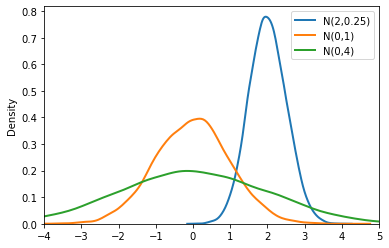

In [50]:
N = 10000
plt.xlim([-4,5])
s = np.random.normal(loc=2, scale=0.5, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,
             kde_kws={'linewidth': 2}, label='N(2,0.25)')

s = np.random.normal(loc=0, scale=1, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,
             kde_kws={'linewidth': 2}, label='N(0,1)')

s = np.random.normal(loc=0, scale=2, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,# color = 'darkblue',
             kde_kws={'linewidth': 2}, label='N(0,4)')

plt.legend()
plt.show()

**Функция плотности распределения в многомерном случае**

Если значения случайной величины $X$ — это многомерные векторы, функция плотности сохраняет примерно тот же смысл: если $\Omega\subseteq\mathbb{R}^n$, то

$$P(X\in\Omega) = \int\limits_{\Omega}p(x)dx$$

**Многомерное нормальное распределение**

Многомерное нормальное распределение определяется также двумя параметрами: *вектором средних* $a$ и положительно определённой *ковариационной матрицей* $\Sigma$; оно имеет плотность

$$p(x) = \frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}$$

где, напомним, $x$ — вектор из $\mathbb{R}^n$. Компоненты вектора $a$ — это математические ожидания отдельных координат $X$, а на диагонали матрицы $\Sigma$ стоят их *дисперсии* (настоящие, без кавычек). Вне диагонали стоят *ковариации* компонент $X$ (пока вам достаточно понимать, что если они равны нулю, то эти компоненты независимы$^1$).

---
$^1$ Точнее сказать, некоррелированны, однако для компонент многомерного нормального распределения независимость и некоррелированность равносильны (на самом деле редкое и удачное свойство!).

**1. [1.5 балла]** Под (n-1)-мерным эллипсоидом будем понимать гиперповерхность в $\mathbb{R}^n$, такую что в некоторой прямоугольной декартовой системе координат её уравнение принимает вид $\sum_{i=1}^n \frac{x_i^2}{r_i^2} = 1$. Докажите, что поверхности уровня $p(x) = c$ — это эллипсоиды.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
Приведём $\Sigma$ к главным осям

После приведения $\Sigma$ к главным осям на диагонали будут стоять строго положительные элементы. Ведь она была положительно определена изначально, то есть соответствовала положительно определенной кв. форме.

А еще заметим, что матрица $C^T \Sigma^{-1} C$ (то есть обратная к приведенной к главным осям $\Sigma$) имеет тот же вид: диагональна, при этом на $i$-й позиции на диагонали стоит обратный к $i$-му элементу на диагонали $C^T\Sigma C$ (это можно проверить просто перемножив две такие диагональные матрицы, получим $E$). Поэтому на ее диагонали тоже будут строго положительные элементы.

Теперь считаем, что в координатах $x'$ матрицы $\Sigma$ и $\Sigma^{-1}$ уже имеют тот самый диагональный вид. Начальные координаты $a$ тоже перешли в $a'$. То есть $x = Cx'$, $a = Ca'$ (эта информация нам бесполезна).

Пусть $p(x') = c$. В то же время знаем, какая формула у $p(x')$. Запишем равенство:

$$c = \frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x' - a')^T\Sigma^{-1}(x' - a')}$$

Перенесем константы:

$$e^{-\frac{1}{2}(x' - a')^T\Sigma^{-1}(x' - a')} = c|\Sigma|^{1/2}(2\pi)^{n/2}$$

То есть:

$$e^{-\frac{1}{2}(x' - a')^T\Sigma^{-1}(x' - a')} = c'$$

Прологарифмировав обе части (и сократив на $-\frac{1}{2}$), получаем:
$$(x' - a')^T\Sigma^{-1}(x' - a') = c''$$

Пусть $x'_i$, $a'_i$ - $i$-е координаты векторов $x'$ и $a'$ соответственно.

Также пусть $\sigma_i := \sqrt{\Sigma_{ii}}$ - корень из $i$-го элемента на диагонали в $\Sigma$ (там только положительные элементы, так что всё нормально). Тогда на диагонали $\Sigma$ стоят $\sigma_i^2$, а по замеченному нами ранее свойству на диагонали в $\Sigma^{-1}$ будут стоять $\sigma_i^{-2}$. Итак, запишем:

$$(x' - a')^T\Sigma^{-1}(x' - a') = \sum_{i = 1}^n(x'_i - a'_i)^2\sigma_i^{-2} = \sum_{i = 1}^n\frac{(x'_i - a'_i)^2}{\sigma_i^2} = c''$$

То есть мы просто получили уравнение эллипсоида с центром $a'$ (мнимого или действительного в зависимости от знака $c''$). Если справа 0, то это просто точка. В противном случае мы можем разделить на констану, чтобы справа получить едицу
$$\sum_{i = 1}^n\frac{(x'_i - a'_i)^2}{(\sqrt{c''}\sigma_i)^2} = 1$$


**2. [1.5 балла]** Пользуясь теоремой о приведении квадратичной формы к главным осям, докажите, что функцию плотности многомерного нормального распределения можно представить в виде произведения одномерных нормальных плотностей. В частности, это означает, что с помощью замены координат можно добиться того, чтобы отдельные компоненты были независимы.

В предыдущем номере уже показали, что с помощью замены координат можно привести $\Sigma$ и $\Sigma^{-1}$ (одновременно) к диагональному виду со строго положительными элементами на диагонали. Далее считаем, что $\Sigma$ и $\Sigma^{-1}$ уже диагональны, а $x$ и $a$ - уже новые координаты (в которых матрицы диагональны). Хотим выписать формулу плотности для этого случая. Получаем:

$$p(x) = \frac{1}{\sqrt{(2\pi)^n|\Sigma|}}e^{-\frac{1}{2}(x - a)^T\Sigma^{-1}(x - a)}$$

Пусть $\sigma_i$ - то же самое, что и в задаче 3.1. Тогда $\sigma_i^2$ и $\sigma_i^{-2}$ будут стоять на $i$-м месте диагонали матриц $\Sigma$ и $\Sigma^{-1}$ соответственно.

Пусть $a_i$ и $x_i$ - $i$-е координаты векторов $a$ и $x$. Тогда, воспользовавшись диагональностью $\Sigma^{-1}$: 
$$(x - a)^T\Sigma^{-1}(x - a) = \sum_{i=1}^n(x_i - a_i)^2\sigma_i^{-2}$$

$$e^{-\frac{1}{2}(x - a)^T\Sigma^{-1}(x - a)} = e^{-\frac{1}{2}\sum_{i=1}^n(x_i - a_i)^2\sigma_i^{-2}} = e^{\sum_{i=1}^n-\frac{1}{2}(x_i - a_i)^2\sigma_i^{-2}} = \prod_{i=1}^n e^{-\frac{1}{2}(x_i - a_i)^2\sigma_i^{-2}}$$

Так как $\Sigma$ диагональна:

$$|\Sigma| = \prod_{i=1}^n\sigma_i^2$$

Перепишем еще раз, применяя полученные результаты:

$$p(x) = \frac{1}{\sqrt{(2\pi)^n\prod_{i=1}^n\sigma_i^2}}\prod_{i=1}^n e^{-\frac{1}{2}(x_i - a_i)^2\sigma_i^{-2}}  = \prod_{i=1}^n\frac{1}{\sqrt{2\pi\sigma_i^2}}e^{-\frac{(x_i - a_i)^2}{2\sigma_i^2}}$$

Это является произведением нормальных плоскостей.

А мы тем временем продемонстрируем это на конкретном примере, сгенерировав много точек из двумерного нормального распределения с вектором средних $(-1,3)$ и ковариационной матрицей

$$\begin{pmatrix}
1 & \frac32\\
\frac32 & 5
\end{pmatrix}$$

и нарисовав приближённо линии уровня функции плотности.

In [51]:
import warnings
warnings.filterwarnings("ignore")

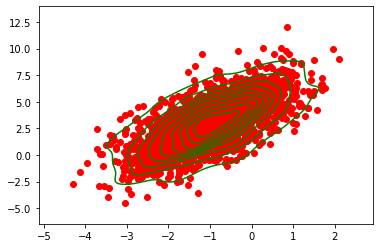

In [52]:
import seaborn as sns
import numpy as np

N = 2000
s = np.random.multivariate_normal(mean=np.array([-1,3]), cov=np.array([[1,1.5],[1.5,5]]), size=N)
plt.scatter(s[:,0], s[:,1], color='red')
sns.kdeplot(s[:,0], s[:,1], shade=False, color='g');

Как видите, линии уровня весьма напоминают эллипсы (только напоминают, потому что точек у нас всё-таки конечное число).

**3. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (0,0)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & -2\\
-2 & 5
\end{pmatrix}.$$

In [53]:
N = 1000
X = np.random.multivariate_normal(mean=np.array([0,0]), cov=np.array([[1,-2],[-2,5]]), size=N)

**4. [0.25 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте на плоскости все точки $x_i$ и направления новых признаков. Убедитесь, что направления новых признаков примерно совпадают с направлениями полуосей эллипса, образованного точками.

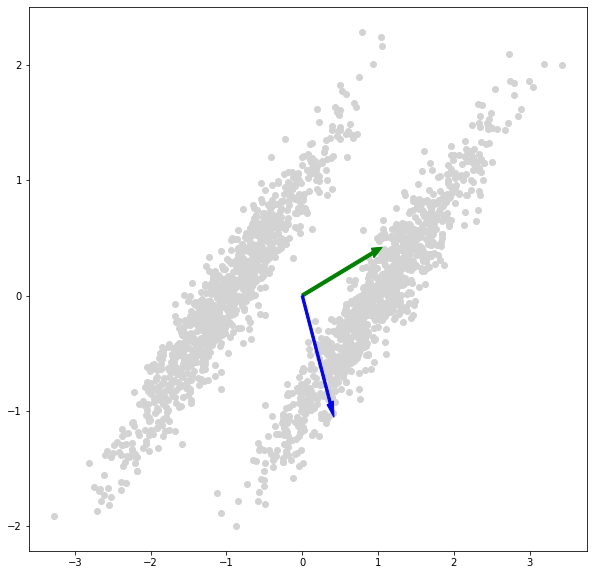

In [68]:
U, S, VT = svd(X, full_matrices=False)

plt.figure(figsize=(10, 10)) 
plt.scatter(X[:,0], X[:,1], c='lightgray')
plt.arrow(0, 0, VT[0, 0], VT[0, 1], width=0.03, color='green')
plt.arrow(0, 0, VT[1, 0], VT[1, 1], width=0.03, color='blue')
plt.show()

**5. [0.5 балла]** Приведите к главным осям матрицу ковариации (это нужно сделать без привлечения `Python`) и убедитесь, что направления этих осей тоже примерно совпадают с наблюдаемыми направлениями полуосей эллипсоида.

$$\chi(t) = (1 - t)(5 - t) - 4 = t^2 - 6t + 1$$
ФСР для каждого корня:

$\lambda_1 = 3 + 2\sqrt{2}: \\
\begin{pmatrix}
-2\sqrt{2} - 2 & -2 \\
-2 & -2\sqrt{2} + 2
\end{pmatrix}
\Rightarrow
\begin{pmatrix}
\sqrt{2} + 1 & 1 \\
1 & \sqrt{2} - 1
\end{pmatrix}
\Rightarrow
\begin{pmatrix}
1 & \sqrt{2} - 1\\
0 & 0
\end{pmatrix}
\Rightarrow
\text{ФСР: }(1 - \sqrt{2}, 1)
$

$\lambda_2 = 3 - 2\sqrt{2}:
\\
\begin{pmatrix}
2\sqrt{2} - 2 & -2 \\
-2 & 2\sqrt{2} + 2
\end{pmatrix}
\Rightarrow
\begin{pmatrix}
\sqrt{2} - 1 & -1 \\
-1 & \sqrt{2} + 1
\end{pmatrix}
\Rightarrow
\begin{pmatrix}
1 & -\sqrt{2} - 1\\
0 & 0 \\
\end{pmatrix}
\Rightarrow
\text{ФСР: }(1 + \sqrt{2}, 1)$

Получили как раз 2 главные оси: $u_1 = (1 - \sqrt{2}, 1)$, $u_2 = (1 + \sqrt{2}, 1)$ Они не нормарлизовали их, но в данной задаче нам необходимо только найти направление, а длина не важна. Визуализируем то, что у нас получилось

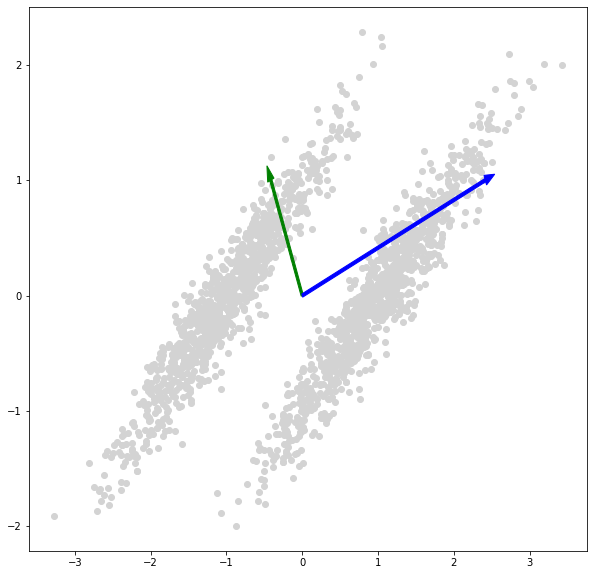

In [67]:
plt.figure(figsize=(10, 10)) 
plt.scatter(X[:,0], X[:,1], c='lightgray')

plt.arrow(0, 0, 1 - 2**0.5, 1, width=0.03, color='green')
plt.arrow(0, 0, 1 + 2**0.5, 1, width=0.03, color='blue')
plt.show()

Как Вы могли убедиться, SVD хорошо справляется со своей работой, когда данные распределены нормально, а в других случаях может давать совсем не такие информативные (или даже не адекватные) результаты.

**6. [0.25 балла]** Сгенерируйте двумерную выборку, представляющую собой два расположенных рядом (см. пример ниже) длинных и узких не пересекающихся эллипса с центрами в точках $(-1,0)$ и $(1,0)$ и с параллельными направлениями полуосей. Иными словами, постарайтесь как можно точнее воспроизвести картинку ниже. 

In [56]:
matrix = [[0.5, 0.475], [0.475, 0.5]]
X1 = np.random.multivariate_normal(mean=np.array([-1, 0]), cov=np.array(matrix), size=N)
X2 = np.random.multivariate_normal(mean=np.array([1, 0]), cov=np.array(matrix), size=N)

**7. [0.1 балла]** Сделайте SVD и нарисуйте направления новых признаков.

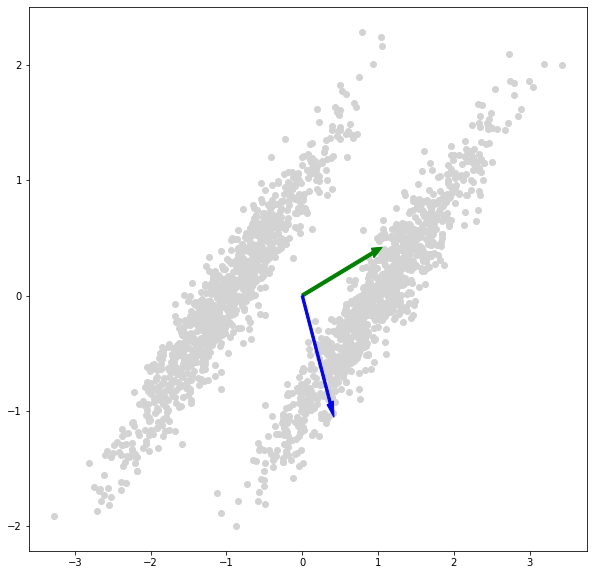

In [66]:
X = np.concatenate((X1, X2),  axis=0)
U, S, VT = svd(X, full_matrices=False)
plt.figure(figsize=(10, 10)) 
plt.scatter(X[:,0], X[:,1], c='lightgray')
plt.arrow(0, 0, VT[0, 0], VT[0, 1], width=0.03, color='green')
plt.arrow(0, 0, VT[1, 0], VT[1, 1], width=0.03, color='blue')
plt.show()

Если бы мы решали задачу анализа данных, то скорее всего нас интересовал признак, который бы разделял два кластера (в данном случае два эллипса), то есть такая функция $f(x)$, для которой
$$f(x) < c,\ \mbox{если объект $x$ из первого класса}$$
$$f(x) > c,\ \mbox{если объект $x$ из второго класса}$$
для некоторого числа $c$.

**8. [0.25 балла]** Помогает ли какой-нибудь из двух предоставленных SVD признаков обнаружить эту структуру? Обязательно поясните свой ответ.

Нет, не помогает. В данном случае угол между получившимся векторами и осями симметрии эллипса получается не слишком близким к нулю

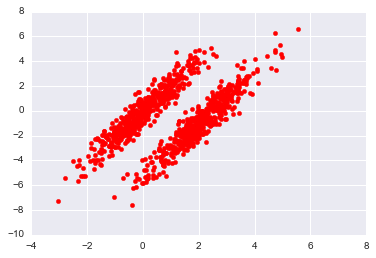

In [ ]:
# Just keep this image as a sample

**9. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (1,1)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & 0\\
0 & 4
\end{pmatrix}.$$

In [58]:
N = 1000
s = np.random.multivariate_normal(mean=np.array([1,1]), cov=np.array([[1,0],[0,4]]), size=N)
U, S, VT = svd(X, full_matrices=False)
print(S)

[57.66842413 24.9799479 ]


**10. [0.2 балла]** Очевидно, что "интересными" для этого датасета направлениями будут направления полуосей эллипса-облака точек. Глядя только на матрицу $\Sigma$, определите, что это будут за направления? Поясните свой ответ.

Это будут направления, параллельные осям координат, поскольку при приведении квадратичной формы к главным осям у нас не будет произведен поворот осей, а только их сжатие и растяжение.

**11. [0.1 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте все точки $x_i$ на плоскости и направления новых признаков.

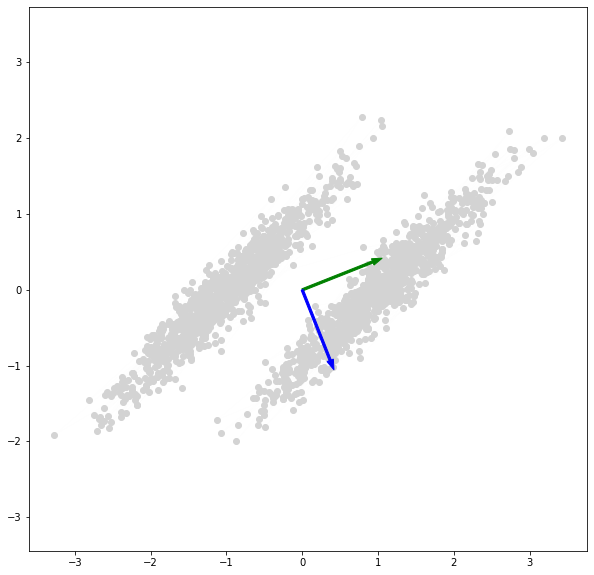

In [65]:
plt.figure(figsize=(10, 10)) 
plt.plot(X[:,0], X[:,1], lw=0.01, marker='o', color='lightgray', zorder=2) 

plt.arrow(0, 0, VT[0, 0], VT[0, 1], width=0.03, color='green', zorder=3)
plt.arrow(0, 0, VT[1, 0], VT[1, 1], width=0.03, color='blue', zorder=3)
plt.axis('equal')
plt.show()

**12. [0.4 балла]** Сделайте вывод: в чём проблема и как можно её исправить?

Таким образом, перед тем, как использовать SVD в анализе данных следует центрировать признаки в нуле. Для этого нужно из каждого признака вычесть его среднее значения.

